In [1]:
# Import the Path class from the pathlib module
from pathlib import Path

# Create a Path object for the directory 'samples'
path = Path('all-samples-wav')

# Initialize an empty list to hold the file paths
files = []

# Check if the path exists and if it's a directory
if path.exists() and path.is_dir():
    # Use a list comprehension with rglob() to gather all .wav files (recursively)
    # and store them in the 'files' list
    files = [file for file in path.rglob('*.wav')]

    # Check how many files were in the directory
    print(f"found {len(files)} audio files in '{path}' folder.")

# If the path doesn't exist or isn't a directory, print a message
else:
    print("'all-samples-wav' directory does not exist.")

found 13300 audio files in 'all-samples-wav' folder.


### Get files name
1.What object type is the variable path?

It is a filesystem path.

2.What object type is stored in the files list?

Path objects,specifically, each item in the files list is a Path object representing a .wav file .

3.Explain the difference between path.exists() and path.is_dir(). Why might both checks be necessary?

path.exist()checks whether the path refers to an existing file or directory in the file system,it doesn't distinguish between types of filesystem objects. 
"path.is-dir()"specifically checks if the path is referring to an existing directory. path.exists() ensures that something is actually there at the specified path, otherwise might try to operate on a non-existent path, and therefore might create errors.

4.Describe the functionality of the rglob() method. How does it differ from the glob() method in pathlib?

"rglob()" is a method for searching for files matching a pattern, it search all directories, but glob() only search current directory.
5.What can you infer about the directory structure from the use of rglob('*.wav')?

"rglob('*.wav')" not only searches for the given directory but also searches its all subdirectories rescursively, so we can infer that all audio files in the folder are not stored in a single flat directory, otherwise a "glob('*.wav')" would have sufficed 
already.

6.What modifications would be needed to include .mp3 files in the files list?

(*I've asked AI for this one because I have no idea how to achieve it.) ''files = [file for file in path.rglob('*.wav')]''

7.If the goal is to also print the names of all the .wav files collected, how can you achieve this?

Use a for loop: 
'
print("Collected .wav files:")
for file in files:
    print(file.name)

print(f"\nTotal number of .wav files: {len(files)}")
'
8.Why might it be beneficial to initialize the files list before populating it with file paths?

Claerify the file list could make the codes more readable and easier to add on more additional statements or logics, also easier for debugging.

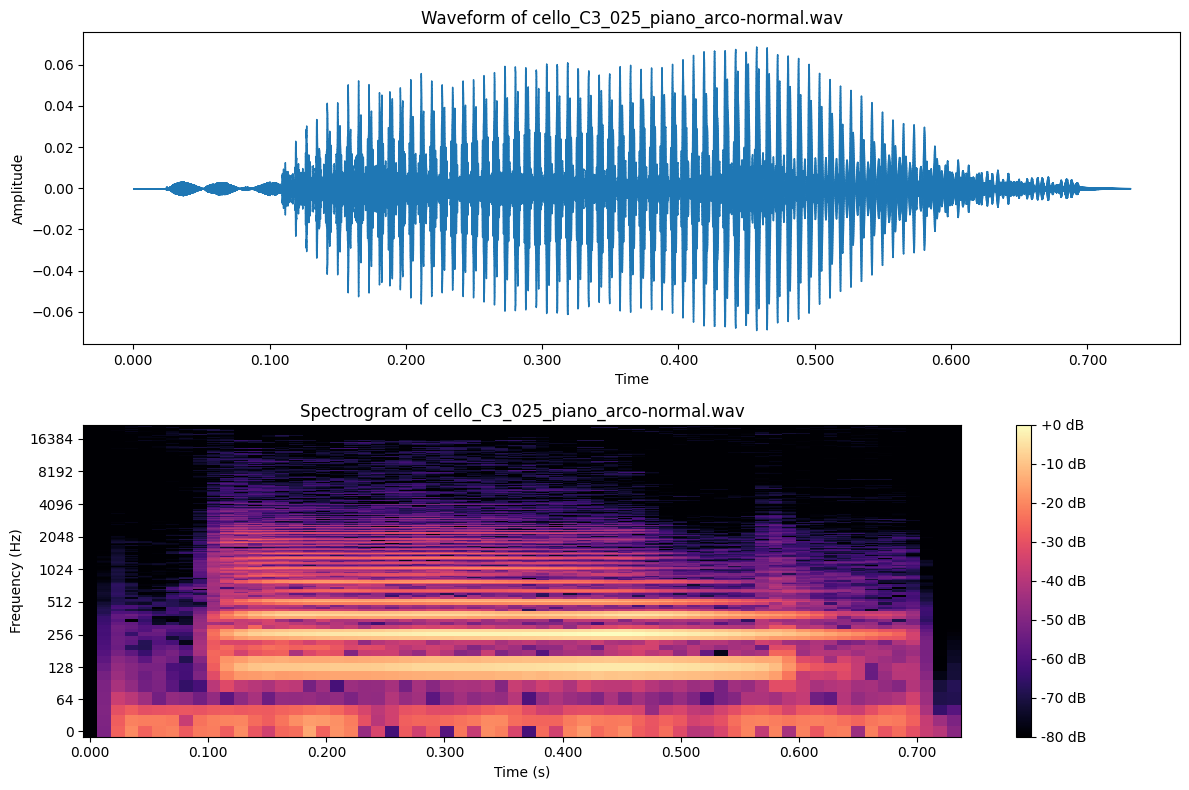

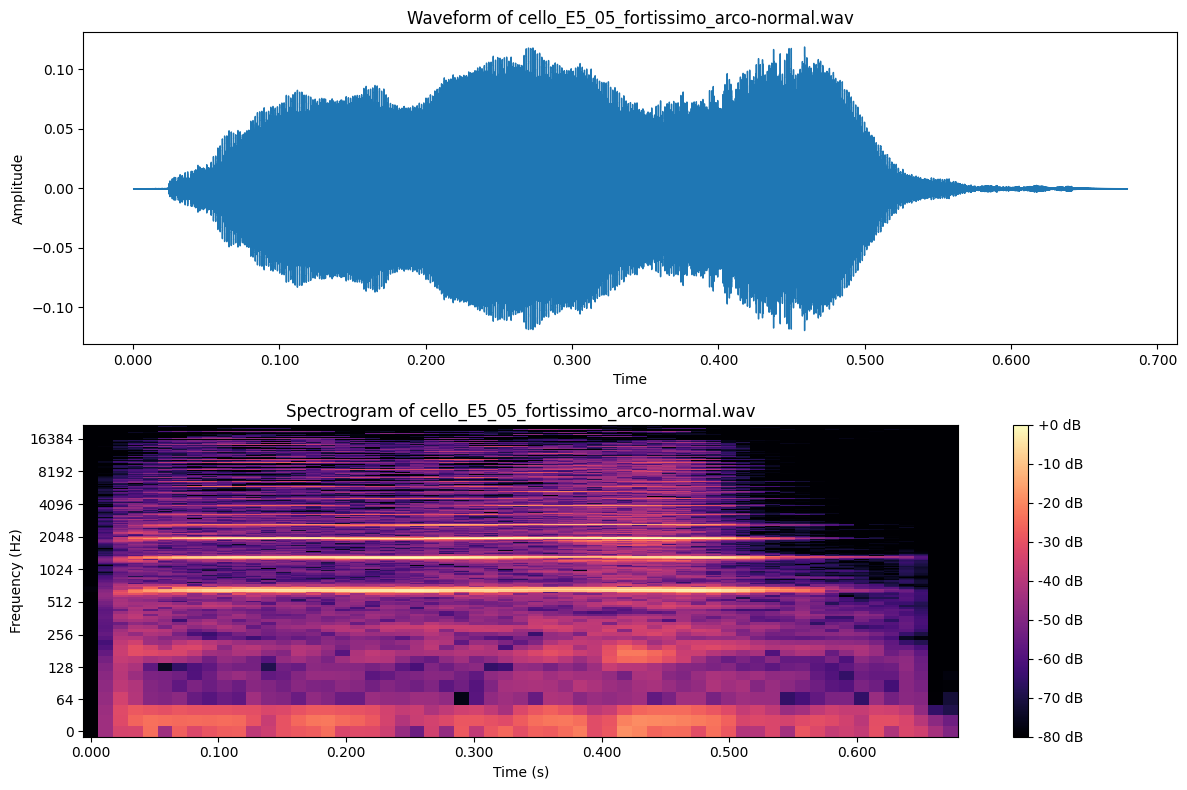

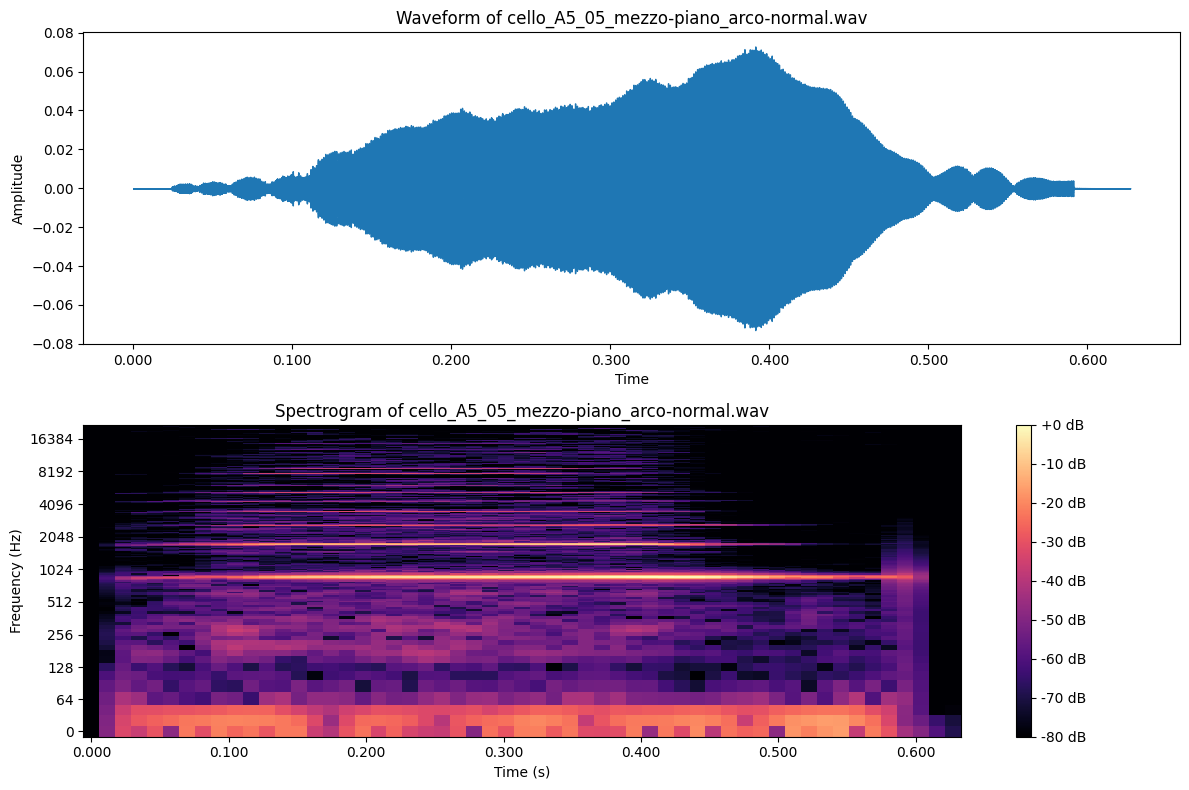

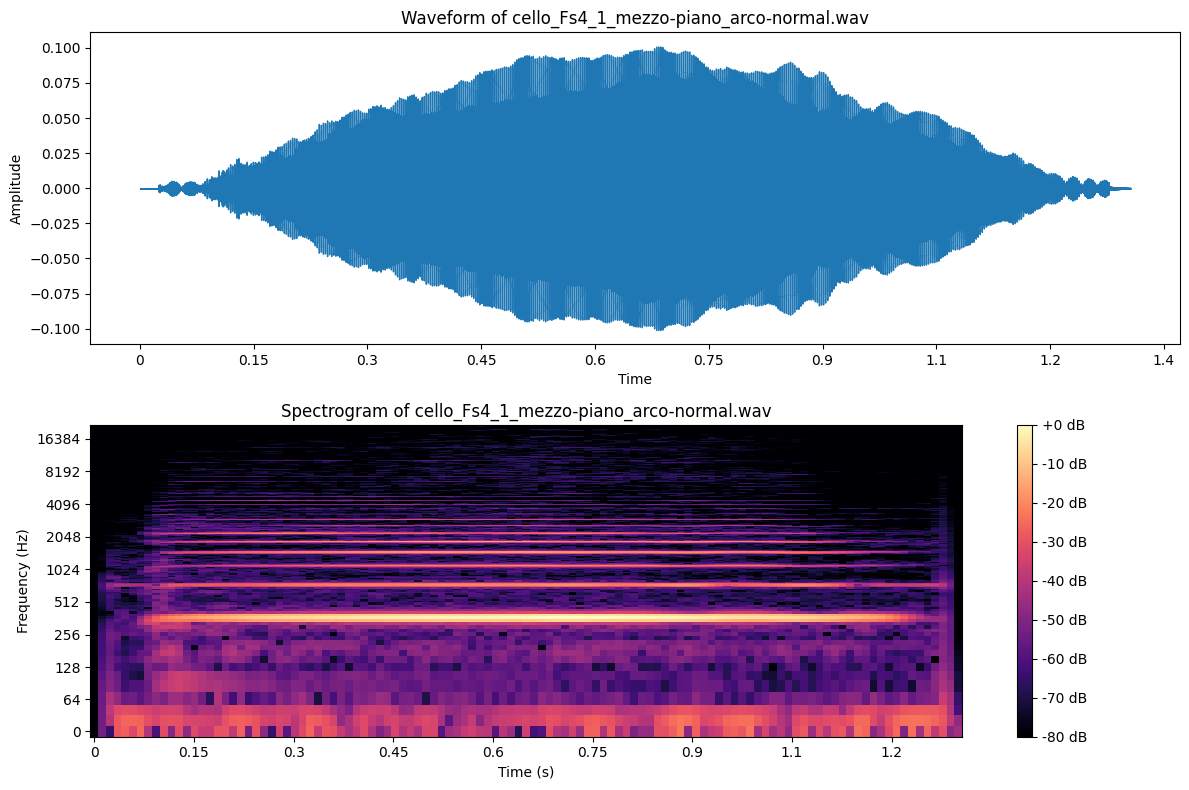

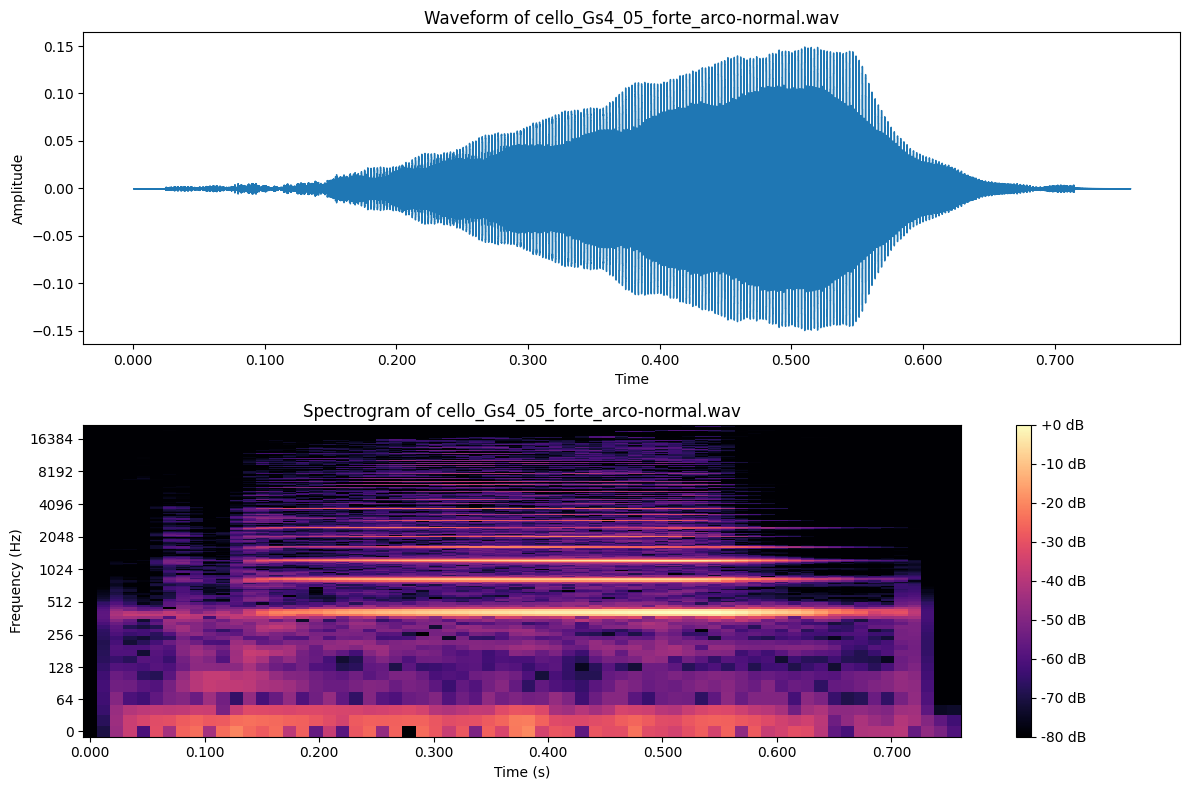

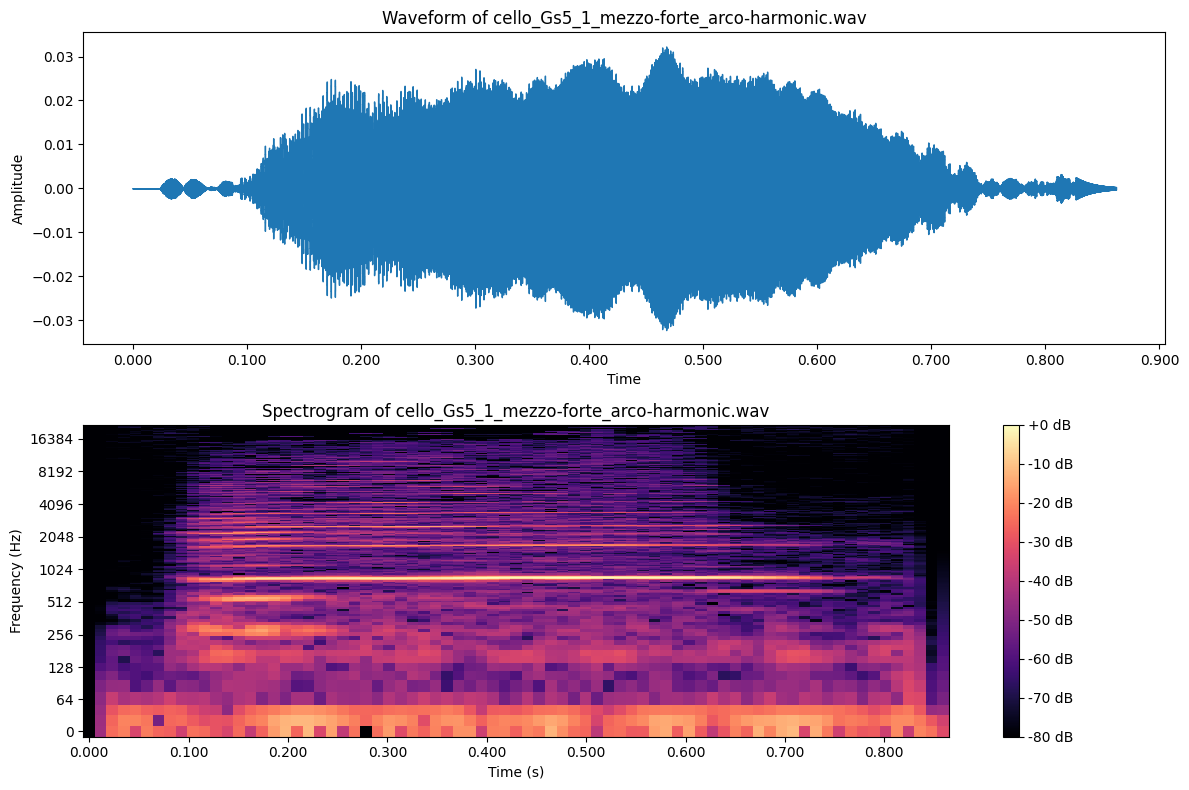

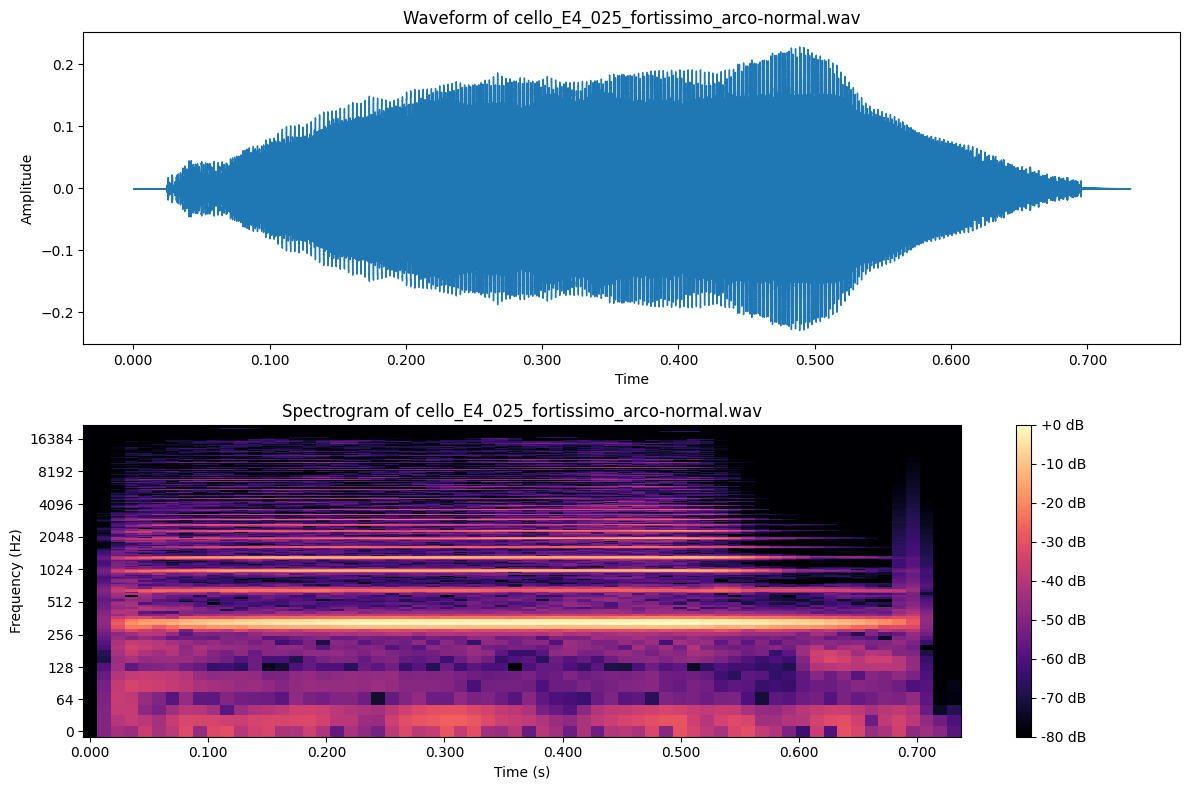

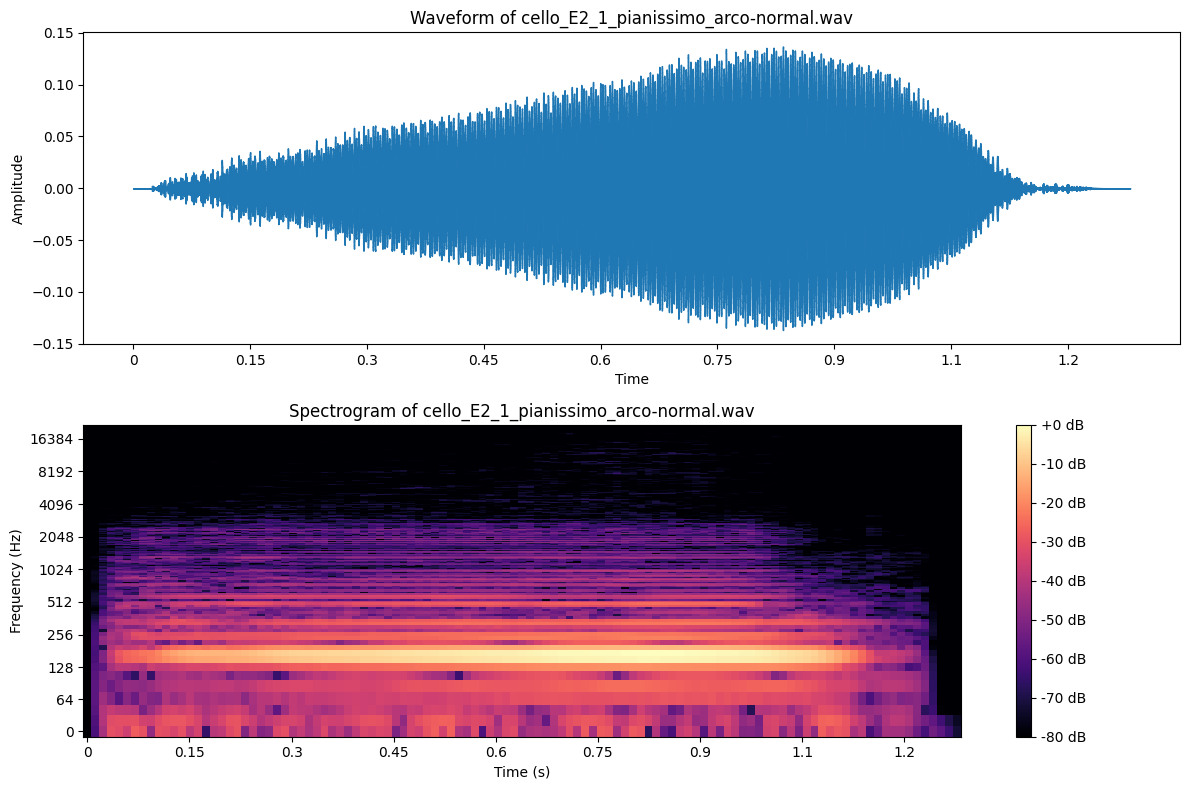

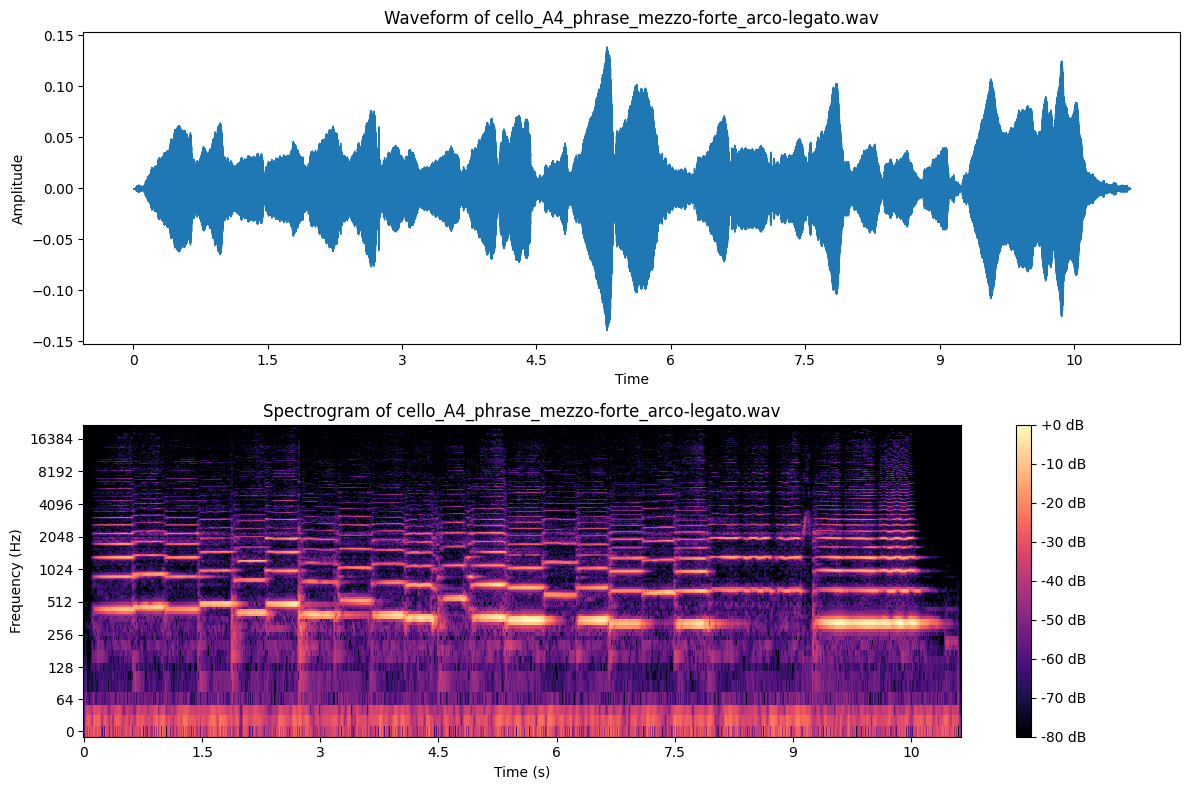

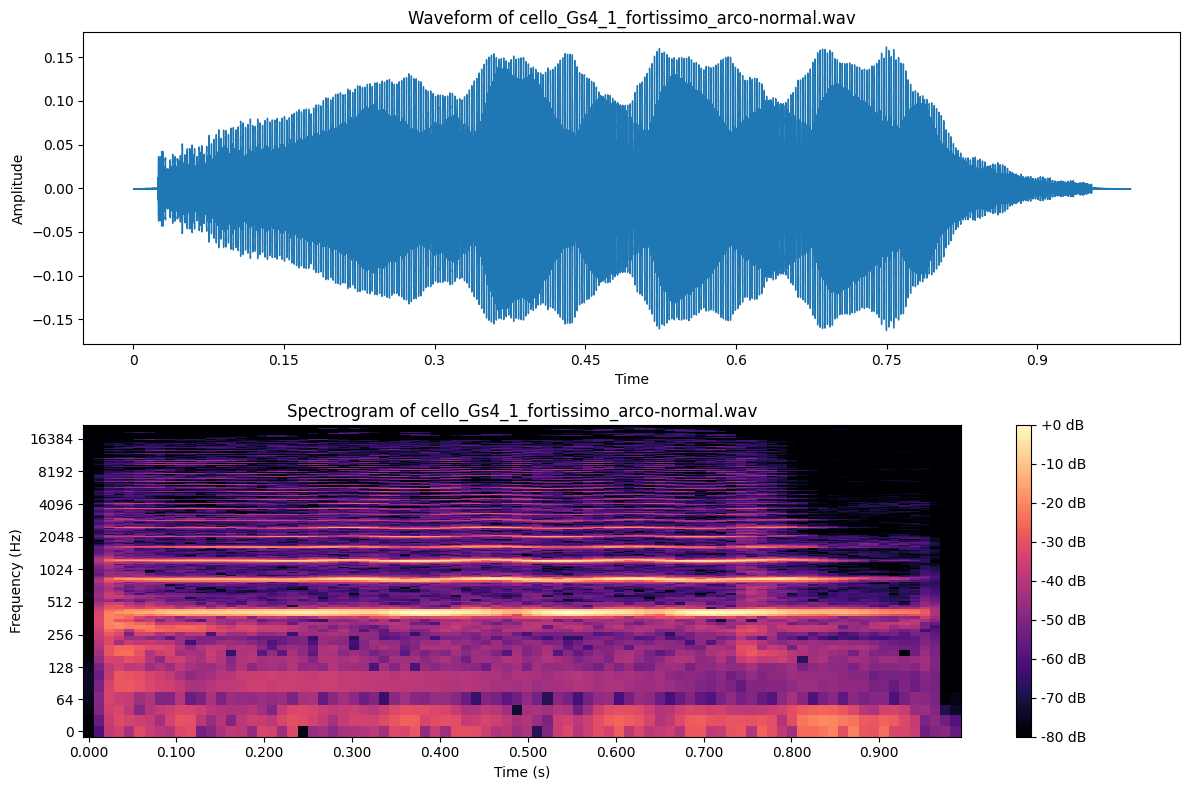

In [3]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os

# Go through the first 10 files in `files`
for index, file_path in enumerate(files[:10]):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Create a figure with two subplots: one for the waveform and one for the spectrogram
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot the waveform
    ax[0].set_title(f"Waveform of {os.path.basename(file_path)}")
    librosa.display.waveshow(y, sr=sr, ax=ax[0])
    ax[0].set_ylabel('Amplitude')
    
    # Compute and plot the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=ax[1])
    ax[1].set_title(f"Spectrogram of {os.path.basename(file_path)}")
    ax[1].set_ylabel('Frequency (Hz)')
    ax[1].set_xlabel('Time (s)')
    fig.colorbar(img, ax=ax[1], format="%+2.0f dB")
    
    plt.tight_layout()
    plt.show()

### Visualizing data

1. What is the role of the `os.path.basename()` function in this code?
   It extracts the filename from a full file path.In this code, it's used to get just the filename. Make the whole process more readable.
2. What does the Short-Time Fourier Transform (STFT) achieve? Why might it be used instead of a regular Fourier Transform for audio signals?
   FFT breaks down audio signals into short windows and apply the transformer on these windos. This allows us to see how frequency content changes over time.
3. Why might the code use two subplots (one for waveform and one for spectrogram) for each audio file? How does this help in understanding the audio data?
waveform shows amplitude variations over time and spectrogram shows how different frequencies are present over time, which they give out a clear view about the audio files.
4. How does the color bar in the spectrogram visualization help in interpreting the data? What does it represent?
The color bar represents how intense of different frequencies at different times,bright meaning more intense darker meaning less.
5. How would the visualization change if you change the `y_axis` parameter in `librosa.display.specshow()` from 'log' to 'linear'?
Log mode would emphasis lower frequency more and linear would display them evenly.
6. Are there any potential performance bottlenecks in visualizing audio data for a large number of files? How might you handle them?
   Slow speed on reading lots of audio files, maybe we can process the files in batch; It might occupy lots of memory usage, downsample the audio if full resolution is not neccessary in this context.

In [4]:
# Define a list of musical instruments to be recognized from the filenames
instruments = [
    'banjo', 'bass', 'bassoon', 'cello', 'clarinet', 
    'contrabassoon', 'double-bass', 'english-horn', 'flute', 
    'french-horn', 'guitar', 'mandolin', 'oboe', 'saxophone', 
    'trombone', 'trumpet', 'tuba', 'viola', 'violin'
]

# Define a function to find the instrument based on the filename
def find_instrument(filename):
    # Iterate over each instrument in the list
    for instrument in instruments:
        # Check if the instrument name exists in the filename (case insensitive)
        if instrument in filename.stem.lower():
            # If found, return the instrument name
            return instrument
    # If no instrument is found, label it as 'other'
    return 'other'

# Create a labels list by applying the find_instrument function 
# on each file in the 'files' list
labels = [find_instrument(file) for file in files]

# Print the total number of labels found for the given path
print(f"found {len(labels)} labels in {path}")

found 13300 labels in all-samples-wav


1. What type of argument does the `find_instrument` function expect?

It expect a file object as its argument,which it should have a stem attribute.

2. If a filename contains the word "bassoon", what will the `find_instrument` function return for that filename?

It will sim[ply return "bassoon", because it is in the instrument list and the function will detects it.

3. If you have a file object with the path "bassoon_A2_1_forte_normal.wav", what would `file.stem` return?

The 'file.stem' would return "bassoon_A2_1_forte_normal".

4. What does the `find_instrument()` function return if it doesn't find any instrument in the filename?

It returns "other".

5. How is the labels list generated with List Comprehension?

'labels = [find_instrument(file) for file in files]'.

6. How do you print the labels?

Simply add "print(labels)".

7. How would you modify the code to count and print the number of "other" labels?

'other_count = labels.count('other')
print(f"Number of 'other' labels: {other_count}")'

In [5]:
# Import the LabelEncoder class from the sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
labelencoder = LabelEncoder()

# Fit the encoder on the labels
labelencoder.fit(labels)

# Display the found classes (instruments) 
print(f"{len(labelencoder.classes_)} instruments:", ", ".join(list(labelencoder.classes_)))

# Transform labels to numbers ranging from 0 to n - 1
numbered_labels = labelencoder.transform(labels)

# Print the numerical encoding for each class
print("Numbered labels for each class: ", labelencoder.transform(labelencoder.classes_))

16 instruments: banjo, bass, cello, clarinet, english-horn, flute, french-horn, guitar, mandolin, oboe, saxophone, trombone, trumpet, tuba, viola, violin
Numbered labels for each class:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [7]:
# Import librosa and numpy modules
import librosa
import numpy as np

# Set constants for audio processing
fs = 44100          # Sampling rate
n_mels = 128        # Number of Mel bands
n_mfcc = 13         # Number of MFCC coefficients to extract

def get_mfcc_features(file_path):
    """
    Extract MFCC features from an audio file.
    
    Parameters:
    - file_path: Path to the audio file.
    
    Returns:
    - A numpy array containing the mean MFCC coefficients.
      If an error occurs, None is returned.
    """
    try:
        # Load audio file
        y, _ = librosa.load(file_path, sr=fs)
        
        # Check if the audio file is too short
        if len(y) < 2:
            print(f"Error loading {file_path}: Too short")
            return None

        # Normalize audio to range [-1, 1]
        y /= np.max(np.abs(y))
        
        # Compute the Mel spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=fs, n_mels=n_mels)
        
        # Compute MFCCs from the log-scaled Mel spectrogram
        mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
        
        # Return the mean of the MFCCs (across time)
        return np.mean(mfcc, axis=1)
    
    except Exception as e:
        # Handle errors and print an error message
        print(f"Error loading {file_path}. Error: {e}")
        return None

# Extract MFCC features from each audio file, and filter out any None values 
# (resulting from errors or very short files)
feature_vectors = [get_mfcc_features(file) for file in files]
feature_vectors = [fv for fv in feature_vectors if fv is not None]

# Print the total number of feature vectors extracted
print(f"Calculated {len(feature_vectors)} mfcc feature vectors")

Calculated 13300 mfcc feature vectors


1. What is the returned data type of `librosa.feature.mfcc`?

It returns 2D numpy array.

2. Why do we normalize the audio data (y) before extracting features?

To make sure different audio files have consistent scaillings.

3. Why do we take the mean of the MFCCs across time?
Provide a fixed-length representation regardless of the audio duration。

4. How does the `n_mfcc` constant affect the output of the `get_mfcc_features` function?

Because it will directlly affects the number of MFCC coefficients extracted.

5. Why might we need to check if the length of `y` is less than 2?

y is less than might referring to presence of extremely short or empty audio files, which these would cause issue in the futher processing.

6. How might you modify this code to extract other features besides MFCCs, like chroma or spectral contrast?

Extracts librosa.feature.chroma_stft or librosa.feature.spectral_contrast and concatenates the mean of all these features into a single vector.

In [8]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
import csv

def standardize_features(features):
    """
    Standardizes the provided feature vectors using StandardScaler.
    
    Parameters:
    - features: A numpy array of feature vectors.
    
    Returns:
    - A numpy array of standardized feature vectors.
    """
    
    # Initialize the standard scaler
    scaler = StandardScaler()
    
    # Fit the scaler to the features and then transform the features
    scaled_features = scaler.fit_transform(features)
    
    return scaled_features

# First, ensure that feature_vectors contains data before proceeding
if feature_vectors:
    # Standardize the feature vectors
    scaled_feature_vectors = standardize_features(np.array(feature_vectors))
    
    # Print the shape of the standardized feature vectors for confirmation
    print("Feature vectors shape:", scaled_feature_vectors.shape)
    
    # Save the standardized feature vectors as a CSV
    # This can be useful later when you do not want to go through the preprocessing stage again
    # Start by generating header names for the CSV file (e.g., MFCC_1, MFCC_2, ...)
    header = [f"MFCC_{i + 1}" for i in range(scaled_feature_vectors.shape[1])]
    
    # Write the standardized feature vectors to a CSV file with the headers
    with open("ScaledFeature.csv", "w", newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)  # Write the header
        writer.writerows(scaled_feature_vectors)  # Write the rows of feature vectors

else:
    # Print a message if there are no feature vectors to process
    print("No feature vectors to scale.")

Feature vectors shape: (13300, 13)


In [9]:
from sklearn.model_selection import train_test_split

# Set the test dataset size (25% of the original dataset by default)
testset_size = 0.25

# Split the dataset into training and testing sets, stratified based on the labels
train_set, test_set, train_classes, test_classes = train_test_split(
    scaled_feature_vectors, 
    numbered_labels, 
    test_size=testset_size, 
    random_state=0,
    stratify=numbered_labels  # This ensures stratification
)

# Check Set Shapes
print("training_set shape:", train_set.shape, "test_set shape:", test_set.shape)
print("training_classes shape:", train_classes.shape, "test_classes shape:", test_classes.shape)

training_set shape: (9975, 13) test_set shape: (3325, 13)
training_classes shape: (9975,) test_classes shape: (3325,)


In [10]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Train the Model
n_neighbors=3
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(train_set, train_classes)

# Predict the instruments using the test set
predicted_labels = model.predict(test_set)

In [11]:
from sklearn.metrics import classification_report, accuracy_score

# Print classification report
print(classification_report(test_classes, predicted_labels))

# Print Accuracy
print(f"Accuracy: {accuracy_score(test_classes, predicted_labels):.2f}")
print(f"Correctly Classified Samples: {accuracy_score(test_classes, predicted_labels, normalize=False)}")
print(f"Number of Test Samples: {test_classes.shape[0]}")

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.95      0.97      0.96       806
           2       0.86      0.88      0.87       230
           3       0.94      0.93      0.94       211
           4       0.95      0.95      0.95       173
           5       0.96      0.99      0.97       220
           6       0.96      0.91      0.93       163
           7       0.91      0.74      0.82        27
           8       0.94      0.75      0.83        20
           9       0.96      0.97      0.96       149
          10       0.90      0.86      0.88       183
          11       0.93      0.98      0.96       208
          12       0.88      0.69      0.78       121
          13       0.96      0.98      0.97       243
          14       0.86      0.92      0.89       243
          15       0.94      0.90      0.92       310

    accuracy                           0.93      3325
   macro avg       0.92   

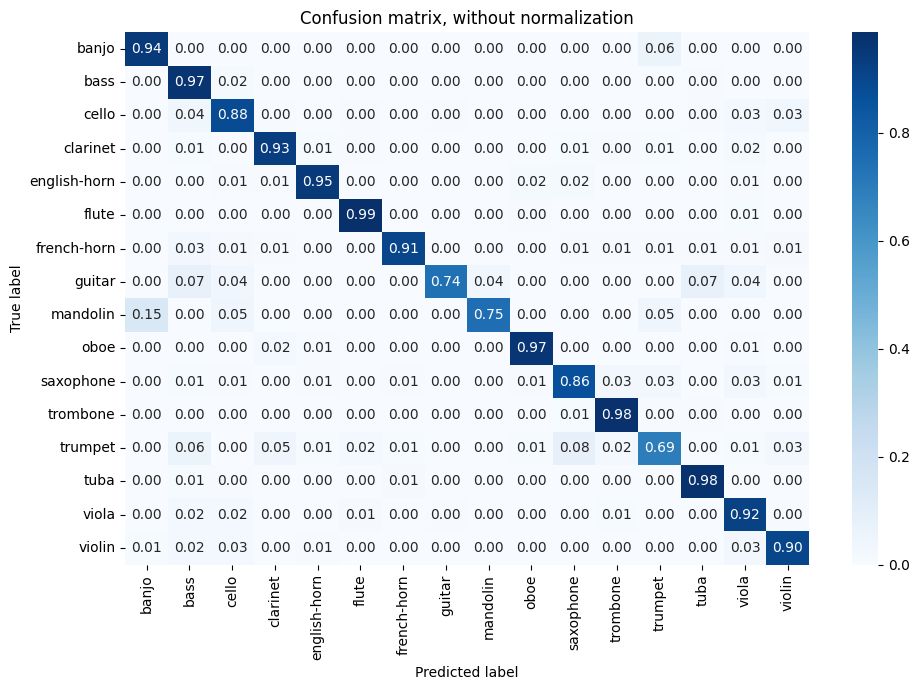

In [12]:
# Import the confusion_matrix function and seaborn at matplotlib modules
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix_seaborn(cm, classes, normalize=False, title='Confusion matrix', cmap="Blues"):
    """
    Plots the confusion matrix using Seaborn's heatmap.
    
    Parameters:
    - cm: Confusion matrix.
    - classes: Names of classes to be labeled on the axes.
    - normalize (optional): Whether to normalize the data. Default is False.
    - title (optional): Title of the plot. Default is 'Confusion matrix'.
    - cmap (optional): Color map. Default is "Blues".
    
    Returns:
    None.
    """
    # Normalize the confusion matrix if the normalize parameter is True
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Set the figure size for the plot
    plt.figure(figsize=(10,7))
    
    # Plot the heatmap using seaborn
    sns.heatmap(cm, 
                annot=True,  # This ensures that the values are plotted in each cell
                fmt=".2f" if normalize else "d",  # Format the numbers to 2 decimal places if normalized, else as integers
                cmap=cmap,  # Set the color map
                xticklabels=classes,  # Set the x-axis labels
                yticklabels=classes)  # Set the y-axis labels
    
    # Set the title and axis labels
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Ensure a tight layout
    plt.tight_layout()

# Compute Confusion Matrix
cnf_matrix = confusion_matrix(test_classes, predicted_labels)
# Call the function to plot the confusion matrix
plot_confusion_matrix_seaborn(cnf_matrix, normalize=True, classes=labelencoder.classes_, title='Confusion matrix, without normalization')

1. Are there other audio features relevant to this exercise?

Chroma Features: Represent the 12 different pitch classes, useful for capturing harmonic and melodic characteristics;Spectral 

Contrast: Measures the difference in amplitude between peaks and valleys in the spectrum.

2. How might the quality or source of the audio recordings impact the classification results?

The higher quality these recording are the more accurate the results would be and vice versa.

3. How would you approach the problem if you had a much larger dataset? Would your feature selection or model choice change?

I might use Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs), as they often perform well with large datasets.

4. How would background noise or other instruments in the audio samples affect the classifier?

It might negatively affect the classifier's performance,the model might struggle to distinguish between the target instrument and background instruments or noise.In extreme cases, the classifier might start identifying background noises as instruments.

5. Why is it important to balance the classes in a dataset? How might class imbalances affect the classifier's performance?

Balanced classes are important because many machine learning algorithms are sensitive to class proportions.

6. How would the classifier perform in a real-world scenario, such as detecting instruments in a live concert recording?

Background noises might interfere with extraction, also real time processing might limit the compleaxity of models used.

7. How would you potentially deploy the model in this lab exercise for real-world use?

I might develop an VST which can be used by musicians directly inside their DAWs, for boosting up the speed of their work flow.

1. Choose another classifier like SVM, Decision Trees, or Neural Networks. Ask them to train, evaluate, and compare its performance against the KNN classifier.
# I asked AI for giving me a SVM example because the codes are too complicated for me to modify them by myself.
By comparision, I found out that both models have 0.93 accuracy which suggests that they both effective. While overall performance is similar, there are slight differences in how well each model classifies specific instruments. And SVM requires more training time as it is a more complexed model compared to KNN.

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.93      0.96      0.95       806
           2       0.92      0.85      0.88       230
           3       0.96      0.94      0.95       211
           4       0.97      0.98      0.98       173
           5       0.98      0.98      0.98       220
           6       0.95      0.88      0.92       163
           7       0.92      0.85      0.88        27
           8       0.85      0.55      0.67        20
           9       0.97      1.00      0.99       149
          10       0.90      0.85      0.87       183
          11       0.93      0.96      0.94       208
          12       0.89      0.80      0.84       121
          13       0.96      0.99      0.97       243
          14       0.89      0.94      0.91       243
          15       0.89      0.91      0.90       310

    accuracy                           0.93      3325

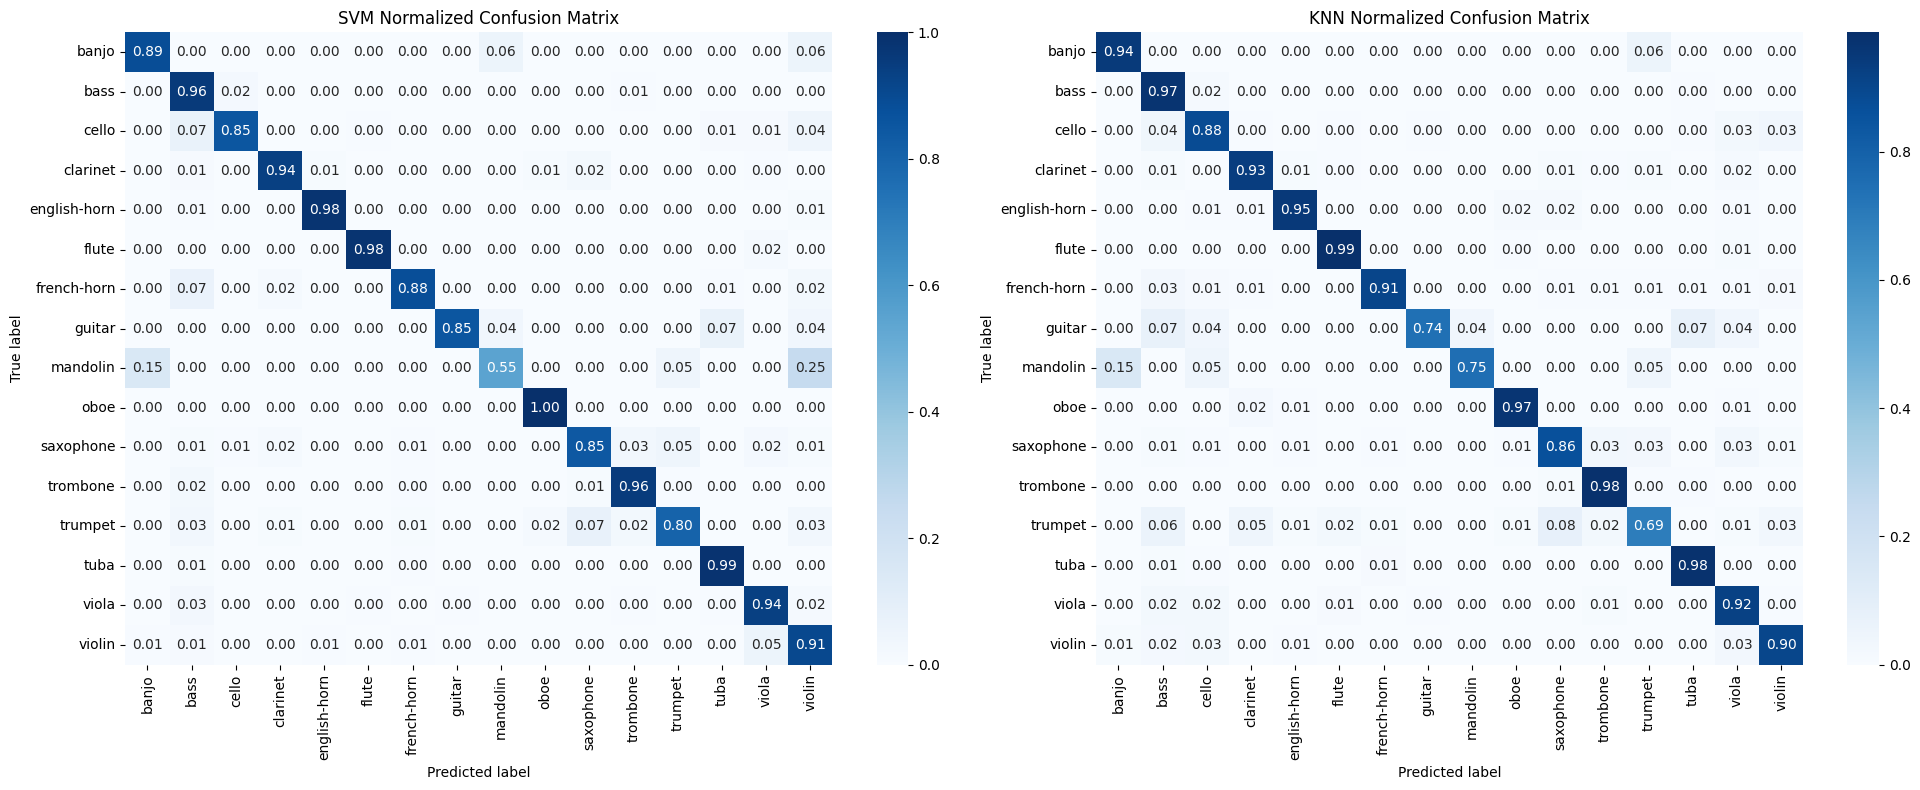


Number of samples where SVM and KNN disagree: 228

Sample disagreements:
True: violin, SVM: bass, KNN: cello
True: clarinet, SVM: saxophone, KNN: clarinet
True: cello, SVM: bass, KNN: bass
True: mandolin, SVM: trumpet, KNN: trumpet
True: saxophone, SVM: trumpet, KNN: saxophone


In [13]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM Classifier
svm_model = SVC(kernel='rbf', random_state=0)
svm_model.fit(train_set, train_classes)

# Predict using SVM
svm_predicted_labels = svm_model.predict(test_set)

# Print SVM classification report
print("SVM Classification Report:")
print(classification_report(test_classes, svm_predicted_labels))

# Print SVM Accuracy
svm_accuracy = accuracy_score(test_classes, svm_predicted_labels)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# KNN Accuracy (assuming we still have access to KNN predictions)
knn_accuracy = accuracy_score(test_classes, predicted_labels)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

# Compare performance for each class
svm_report = classification_report(test_classes, svm_predicted_labels, output_dict=True)
knn_report = classification_report(test_classes, predicted_labels, output_dict=True)

print("\nComparison by class:")
for class_name in labelencoder.classes_:
    svm_f1 = svm_report[str(labelencoder.transform([class_name])[0])]['f1-score']
    knn_f1 = knn_report[str(labelencoder.transform([class_name])[0])]['f1-score']
    print(f"{class_name}: SVM F1 = {svm_f1:.2f}, KNN F1 = {knn_f1:.2f}")

# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

svm_cm = confusion_matrix(test_classes, svm_predicted_labels, normalize='true')
knn_cm = confusion_matrix(test_classes, predicted_labels, normalize='true')

sns.heatmap(svm_cm, annot=True, fmt=".2f", cmap="Blues", ax=ax1, xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_)
ax1.set_title("SVM Normalized Confusion Matrix")
ax1.set_ylabel("True label")
ax1.set_xlabel("Predicted label")

sns.heatmap(knn_cm, annot=True, fmt=".2f", cmap="Blues", ax=ax2, xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_)
ax2.set_title("KNN Normalized Confusion Matrix")
ax2.set_ylabel("True label")
ax2.set_xlabel("Predicted label")

plt.tight_layout()
plt.show()

# Identify where models disagree
disagreements = test_classes != svm_predicted_labels
disagreement_indices = np.where(disagreements)[0]
print(f"\nNumber of samples where SVM and KNN disagree: {sum(disagreements)}")

if len(disagreement_indices) > 0:
    print("\nSample disagreements:")
    for i in disagreement_indices[:5]:  # Show first 5 disagreements
        true_label = labelencoder.inverse_transform([test_classes[i]])[0]
        svm_pred = labelencoder.inverse_transform([svm_predicted_labels[i]])[0]
        knn_pred = labelencoder.inverse_transform([predicted_labels[i]])[0]
        print(f"True: {true_label}, SVM: {svm_pred}, KNN: {knn_pred}")